# 누적값 계산하기

In [2]:
import pandas as pd

df = pd.read_csv('../data-2/revenue.csv') # 월 별 매출표
df

,month,revenue
0,1,35.8
1,2,29.7
2,3,36.3
3,4,39.6
4,5,45.5
5,6,49.4
6,7,105.1
7,8,123.5
8,9,155.4
9,10,221.8


Q1. 연 매출 목표가 1천억원일 때, 목표를 달성했나요?

In [3]:
# 연 매출
 # axis=0, 행 방향이 생략된 것!

df['revenue'].sum(axis=0)

1364.9999999999998

> 네, 약 365억원을 초과 달성했습니다.

- cumsum은 cumulative sum, 누적합

In [4]:
df['revenue'].cumsum()

0       35.8
1       65.5
2      101.8
3      141.4
4      186.9
5      236.3
6      341.4
7      464.9
8      620.3
9      842.1
10    1099.7
11    1365.0
Name: revenue, dtype: float64

In [5]:
df['revenue_cumsum'] = df['revenue'].cumsum()

<Axes: >

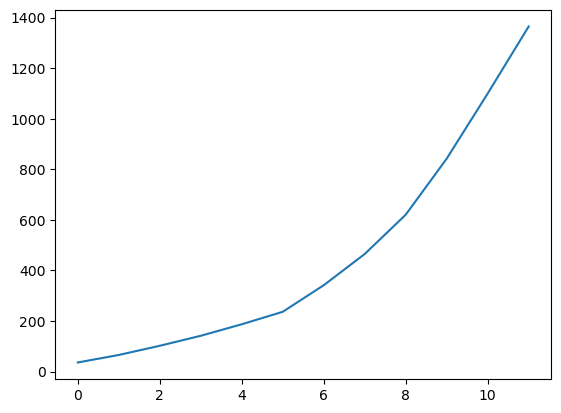

In [7]:

df['revenue_cumsum'].plot(kind = 'line')


In [9]:
df

,month,revenue,revenue_cumsum
0,1,35.8,35.8
1,2,29.7,65.5
2,3,36.3,101.8
3,4,39.6,141.4
4,5,45.5,186.9
5,6,49.4,236.3
6,7,105.1,341.4
7,8,123.5,464.9
8,9,155.4,620.3
9,10,221.8,842.1


- df.plot(df에 속해있는 데이터를 활용해, x 또는 y 지정 및 그래프 종류 선택)

<AxesSubplot:xlabel='month'>

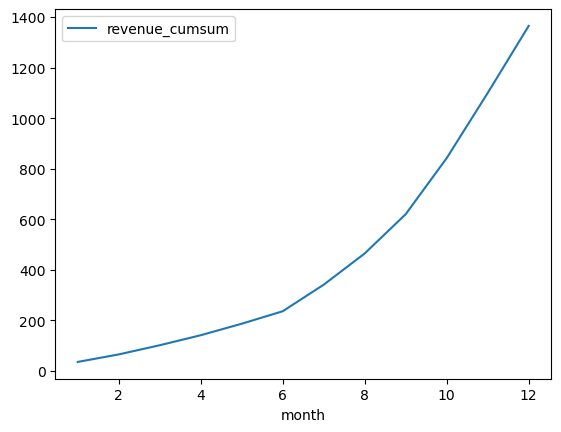

> 하반기로 갈수록 성장이 두드러집니다. 마케팅이나 신제품을 출시해 성과를 거두고 있는 걸로 보입니다!

<Axes: xlabel='month'>

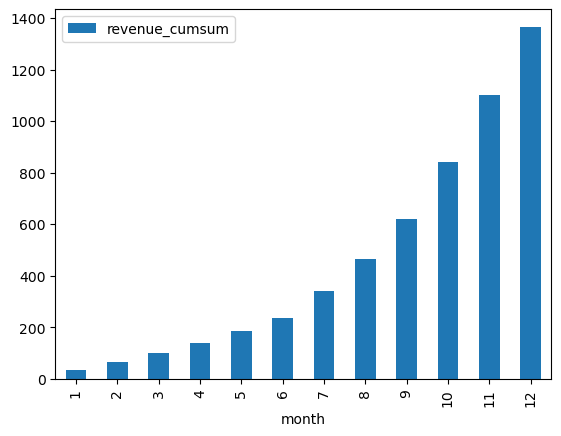

In [8]:
df.plot(x='month', y='revenue_cumsum', kind='bar')

> 누적 목표액을 11월에 이미 초과 달성했구나!

- interest_df :  연도 별 이자율

In [9]:
interest_df = pd.read_csv('../data-2/interest.csv') # 연도별 이자율
interest_df

,year,interest
0,2001,0.0546
1,2002,0.0471
2,2003,0.0415
3,2004,0.0375
4,2005,0.0357
5,2006,0.0436
6,2007,0.0501
7,2008,0.0567
8,2009,0.0323
9,2010,0.0318


- multiple
    - 누적 곱셈을 위해, 1을 더해준 값을 열에 추가해준다.

In [11]:
interest_df['multiple'] = interest_df['interest'] + 1
interest_df

,year,interest,multiple
0,2001,0.0546,1.0546
1,2002,0.0471,1.0471
2,2003,0.0415,1.0415
3,2004,0.0375,1.0375
4,2005,0.0357,1.0357
5,2006,0.0436,1.0436
6,2007,0.0501,1.0501
7,2008,0.0567,1.0567
8,2009,0.0323,1.0323
9,2010,0.0318,1.0318


- cumprod : cumulative product, 누적 곱셈

In [12]:
interest_df['cumulative_multiple'] = interest_df['multiple'].cumprod()

In [13]:
interest_df

,year,interest,multiple,cumulative_multiple
0,2001,0.0546,1.0546,1.054600
1,2002,0.0471,1.0471,1.104272
2,2003,0.0415,1.0415,1.150099
3,2004,0.0375,1.0375,1.193228
4,2005,0.0357,1.0357,1.235826
5,2006,0.0436,1.0436,1.289708
6,2007,0.0501,1.0501,1.354322
7,2008,0.0567,1.0567,1.431112
8,2009,0.0323,1.0323,1.477337
9,2010,0.0318,1.0318,1.524317


> 위를 쉽게 해석해보자면, 2001년부터 특정 이자 수익을 계산해본다면, 2020년에 총 1.88배 즉 88%의 자산 증식이 가능하다라는 이야기입니다.